In [1]:
import os
os.chdir('..')

In [200]:
import mlflow
import pandas as pd

In [201]:
infos = mlflow.list_run_infos('0')
info = infos[0]

In [202]:
pd.DataFrame([{ k[1:]: v for k, v in info.__dict__.items() } for info in infos])

,run_uuid,run_id,experiment_id,user_id,status,start_time,end_time,lifecycle_stage,artifact_uri
0,04c8de6454d4476b94d1fcc7f488381f,04c8de6454d4476b94d1fcc7f488381f,0,afsm,FINISHED,1608576760795,1608576774207,active,./mlruns/0/04c8de6454d4476b94d1fcc7f488381f/ar...
1,f45a69af2f9446868f5c0f8aa70c0820,f45a69af2f9446868f5c0f8aa70c0820,0,afsm,FINISHED,1608576715347,1608576728075,active,./mlruns/0/f45a69af2f9446868f5c0f8aa70c0820/ar...
2,d8c4cdf4127347849bc77fee854465ad,d8c4cdf4127347849bc77fee854465ad,0,afsm,FINISHED,1608576703057,1608576715150,active,./mlruns/0/d8c4cdf4127347849bc77fee854465ad/ar...
3,40e301d14375491b8f3291a02a685800,40e301d14375491b8f3291a02a685800,0,afsm,FINISHED,1608498079929,1608498093793,active,./mlruns/0/40e301d14375491b8f3291a02a685800/ar...
4,aa1d73c403c843d79b961d75aa2576c1,aa1d73c403c843d79b961d75aa2576c1,0,afsm,FINISHED,1608492045356,1608492057349,active,./mlruns/0/aa1d73c403c843d79b961d75aa2576c1/ar...
5,4ea990a822fc444a8c8d00133a5c13b6,4ea990a822fc444a8c8d00133a5c13b6,0,afsm,FINISHED,1608492010570,1608492022274,active,./mlruns/0/4ea990a822fc444a8c8d00133a5c13b6/ar...
6,3507ed4afa754193a695b1ec5e8ba881,3507ed4afa754193a695b1ec5e8ba881,0,afsm,FINISHED,1608491930502,1608491942725,active,./mlruns/0/3507ed4afa754193a695b1ec5e8ba881/ar...
7,575f380ff6b1457792732b687c2b7cce,575f380ff6b1457792732b687c2b7cce,0,afsm,FINISHED,1608491829053,1608491846173,active,./mlruns/0/575f380ff6b1457792732b687c2b7cce/ar...
8,054ef7280e09494081866fd90130f1b4,054ef7280e09494081866fd90130f1b4,0,afsm,FINISHED,1608392103834,1608392121581,active,./mlruns/0/054ef7280e09494081866fd90130f1b4/ar...
9,43508605c1a443639a3f8d87d424e3d3,43508605c1a443639a3f8d87d424e3d3,0,afsm,FINISHED,1608392087685,1608392103708,active,./mlruns/0/43508605c1a443639a3f8d87d424e3d3/ar...


In [203]:
model = mlflow.sklearn.load_model(os.path.join(info.artifact_uri, 'model'))
(_, vec), (_, clf) = model.steps
model

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=1000, ngram_range=(1, 3),
                                 preprocessor=<function preprocess at 0x7f86b1f20cb0>,
                                 stop_words=['de', 'a', 'o', 'que', 'e', 'é',
                                             'do', 'da', 'em', 'um', 'para',
                                             'com', 'não', 'uma', 'os', 'no',
                                             'se', 'na', 'por', 'mais', 'as',
                                             'dos', 'como', 'mas', 'ao', 'ele',
                                             'das', 'à', 'seu', 'sua', ...],
                                 strip_accents='unicode')),
                ('svc', SVC(probability=True))])

In [290]:
# text = 'como a deputada estadual, apalpada por um colega no plenário da Assembleia Legislativa de São Paulo, outras quatro deputadas federais relataram à Folha que já foram assediadas no exercício de suas funções. As mulheres representam 15% dos integrantes da Câmara dos Deputados, composta em sua maioria por homens brancos. No Código Penal, os fatos narrados poderiam ser enquadrados como importunação sexual, crime que prevê de um a cinco anos de reclusão. Isa Penna (PSOL) registrou um boletim de ocorrência contra o deputado Fernando Cury (Cidadania) e também levou ao Conselho de Ética da Assembleia uma representação pedindo que ele perca o mandato.'
text = 'Moraes vai relatar pedido para derrubar decisão que suspendeu criação do juiz de garantias. Embora Supremo Tribunal Federal esteja em recesso, ministro Alexandre de Moraes informou à Presidência que continuará a despachar casos urgentes do gabinete. O ministro Alexandre de Moraes, do Supremo Tribunal Federal, foi definido como relator do pedido de um grupo de advogados para derrubar a decisão que suspendeu a criação da figura do juiz de garantias. Na prática, se o pedido for atendido, condenados podem ser libertados. A decisão de suspender a criação do juiz de garantias foi tomada em janeiro pelo atual presidente do STF, ministro Luiz Fux. A figura do juiz de garantias foi incluída por parlamentares no chamado "pacote anticrime" durante a análise da matéria no Congresso e sancionada pelo presidente Jair Bolsonaro no fim do ano passado. Advogados vão ao Supremo para derrubar decisão que suspendeu a criação do juiz de garantias. Segundo a proposta, o juiz de garantias seria responsável por acompanhar uma investigação e autorizar medidas como prisões e quebras de sigilo até que outro juiz analise o caso e julgue se o réu deve ou não ser condenado. Em janeiro, o ministro Luiz Fux, atual presidente do Supremo Tribunal Federal, suspendeu a criação do juiz de garantias até que o plenário do STF analise o caso. Fux, relator das ações que questionam a figura do juiz de garantias, entende que esse ponto do pacote anticrime representa uma violação à Constituição. Na decisão, o ministro disse que a proposta deveria ter sido elaborada pelo Judiciário porque tem impacto em todo o sistema de Justiça do país. Além disso, segundo ele, a implantação de um juiz para a fase de investigação e outro para a fase de julgamento do processo poderia gerar um risco de colapso na Justiça criminal brasileira. Mas o Instituto de Garantias Penais, que tem entre os associados advogados que defendem investigados e réus da Lava Jato, apresentou um pedido de habeas corpus ao Supremo a fim de derrubar a decisão de Fux. Na ação, os advogados argumentam que várias pessoas estão detidas irregularmente porque não tiveram as prisões analisadas pelo juiz competente, que seria, na opinião dos advogados, o juiz de garantias. O habeas corpus aponta o ministro Luiz Fux como autoridade coatora, o que impede que ele julgue o pedido. Apesar de o STF estar em recesso, período em que o presidente fica responsável por analisar casos urgentes, Alexandre de Moraes informou à Presidência que continuará analisando pedidos que chegarem a seu gabinete durante esse período. Atualmente, o STF tem um entendimento de que uma decisão individual de ministro não pode ser contestada por habeas corpus. Especialistas consideram que, se essa liminar for aceita, milhares de ações penais julgadas neste ano sem a figura do juiz de garantias podem ser anuladas, e os condenados, libertados, entre os quais réus que cometeram crimes violentos ou condenados por corrupção.'

In [296]:
model.predict([text])

array(['true'], dtype=object)

In [285]:
import eli5
eli5.show_weights(clf, vec=vec, top=20, target_names=clf.classes_)

In [35]:
eli5.show_prediction(clf, text, vec=vec, target_names=clf.classes_)

In [204]:
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [308]:
explainer = LimeTextExplainer(class_names=clf.classes_)

exp = explainer.explain_instance(text, model.predict_proba, num_features=10)
# exp = explainer.explain_instance(missclassified.sample().text.values[0], model.predict_proba, num_features=6)

In [309]:
exp.show_in_notebook(text=True)

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
from datasets import fake_br_corpus

In [219]:
test = fake_br_corpus.loadTest()

In [220]:
sample = test.sample()
text = sample.text.values[0]
sample.label

909    true
Name: label, dtype: object

In [221]:
test.text.apply(lambda x: len(x)).min()

73

In [257]:
pred = model.predict(test.text)
# pred = model.predict(test.text.apply(lambda text: text[:73]))

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [258]:
from sklearn.metrics import classification_report, accuracy_score

In [259]:
print(classification_report(test.label, pred))
accuracy_score(test.label, pred)

              precision    recall  f1-score   support

        fake       0.97      0.96      0.97       553
        true       0.96      0.97      0.97       527

    accuracy                           0.97      1080
   macro avg       0.97      0.97      0.97      1080
weighted avg       0.97      0.97      0.97      1080



0.9675925925925926

In [260]:
from matplotlib import pyplot as plt
import seaborn as sns

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='num_words', ylabel='Count'>

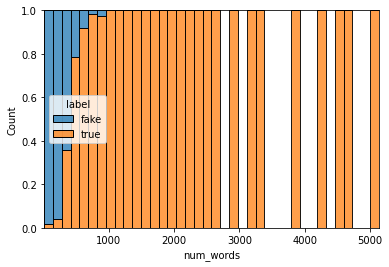

In [323]:
test['text_size'] = test.text.apply(lambda x: len(x))
test['num_words'] = test.text.apply(lambda x: len(x.split()))
sns.histplot(test, x='num_words', hue='label', multiple='fill')

In [315]:
test['pred'] = pred

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [316]:
missclassified = test[test.pred != test.label]

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='num_words', ylabel='Count'>

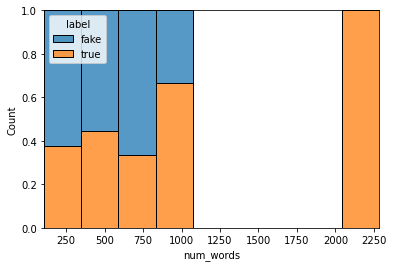

In [324]:
sns.histplot(missclassified, x='num_words', hue='label', multiple='fill')

In [265]:
vectors = pd.DataFrame(vec.transform(test.text).toarray())

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [279]:
vectors[test.label=='fake'].mean(axis=1).mean()

0.005338962819255925

In [278]:
vectors[test.label=='true'].mean(axis=1).mean()

0.00956367558393631

In [140]:
vectors['text_size'] = test.text_size

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
corr = vectors.corr()

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

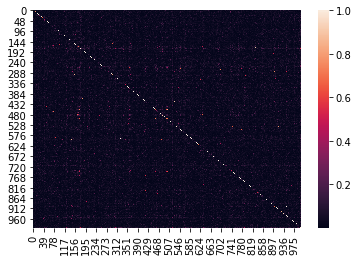

In [155]:
sns.heatmap(corr.abs())

In [145]:
import numpy as np 

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
corr.values - np.identity(corr.shape[0])

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.        ,  0.01378857,  0.00713017, ...,  0.03021947,
         0.00062944, -0.04028137],
       [ 0.01378857,  0.        , -0.00174293, ...,  0.05138668,
         0.00072454,  0.08069401],
       [ 0.00713017, -0.00174293,  0.        , ..., -0.00986786,
        -0.02586543, -0.00168055],
       ...,
       [ 0.03021947,  0.05138668, -0.00986786, ...,  0.        ,
         0.02402011,  0.10280699],
       [ 0.00062944,  0.00072454, -0.02586543, ...,  0.02402011,
         0.        ,  0.07771744],
       [-0.04028137,  0.08069401, -0.00168055, ...,  0.10280699,
         0.07771744,  0.        ]])

In [152]:
corr.abs().values.mean()

0.033309292851202876

In [170]:
corr.text_size.abs().sort_values(ascending=False)

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


text_size    1.000000
178          0.542311
717          0.435558
791          0.421005
308          0.414174
               ...   
390          0.000842
908          0.000605
214          0.000398
687          0.000367
495          0.000077
Name: text_size, Length: 1001, dtype: float64

In [173]:
probas = clf.predict_proba(vectors.drop(columns=['text_size']))

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
clf.classes_

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['fake', 'true'], dtype=object)

In [176]:
fakeProba = probas[:,0]

In [182]:
aaa=pd.DataFrame([vectors.iloc[:, 178], fakeProba])

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
aaa.T.corr()

/home/afsm/git/tmp/fake-news-detection/.venv/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,178,Unnamed 0
178,1.000000,-0.557981
Unnamed 0,-0.557981,1.000000


In [191]:
vec.get_feature_names()[178]

'de'